In [ ]:
import os
import numpy as np
import cv2
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams["figure.figsize"] = (10,10)


In [ ]:
!cp /content/drive/"My Drive"/data/training_data.csv /content/
!cp /content/drive/"My Drive"/zip/frames.zip /content/
!unzip frames.zip 

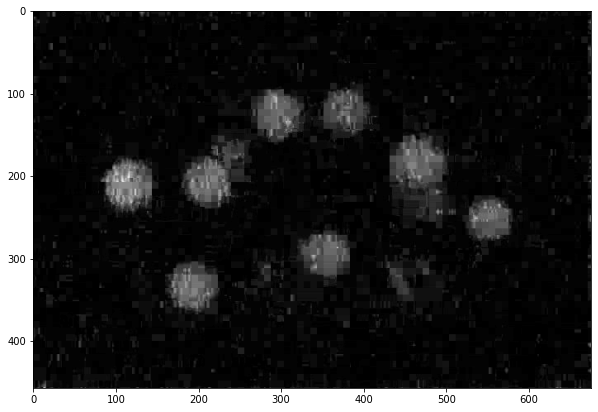

In [ ]:
frame_paths = pd.read_csv("training_data.csv")['filenames'].values
sample = cv2.imread(frame_paths[15],0)
# sample = cv2.medianBlur(sample , 3)
plt.imshow(sample)
plt.show()

In [ ]:
def threshold_image_np(raw_img, upper_gray_threshold, invert = False):  ## converts all pixels above upper_gray_threshold to 255 = white 
    
    if invert == True:
        ret,thresh1 = cv2.threshold(raw_img ,upper_gray_threshold,  255, cv2.THRESH_BINARY_INV)
    else:
        ret,thresh1 = cv2.threshold(raw_img ,upper_gray_threshold,  255, cv2.THRESH_BINARY)
    return thresh1

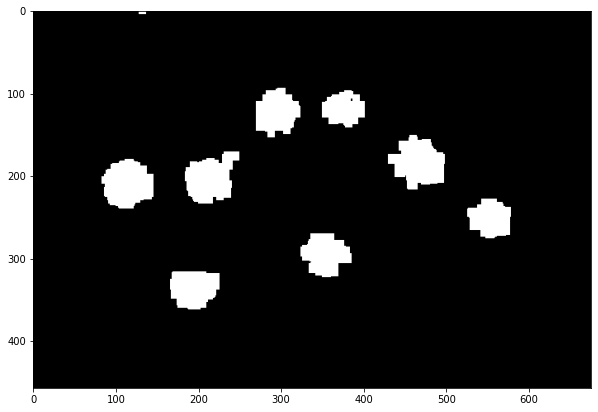

In [ ]:
thresh = threshold_image_np(sample, 20)
kernel = np.ones((5, 5), np.uint8) 
eroded = cv2.erode(thresh, kernel) 
dil = cv2.dilate(eroded,kernel,iterations = 2)
plt.imshow(dil)

In [ ]:
def preprocess_image(image_path):
    im = cv2.imread(image_path,0)
    thresh = threshold_image_np(im, 15) 
    kernel = np.ones((3, 3), np.uint8) 
    eroded = cv2.erode(thresh, kernel) 
    dil = cv2.dilate(eroded,kernel,iterations = 2)
    
    final = cv2.bitwise_and(im, dil)
    return final

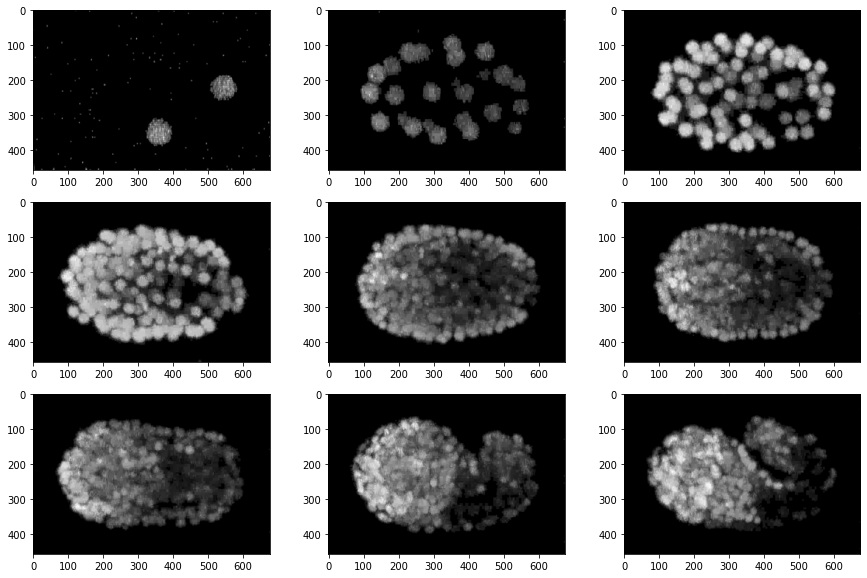

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (15,10))

count = 0
for i in range(0, len(frame_paths), 30):
    sample = preprocess_image(frame_paths[i])
    ax.flat[count].imshow(sample)
    count += 1

In [ ]:
os.mkdir("processed_frames")
folder = "processed_frames"
for filename in frame_paths:
    save_im = preprocess_image(filename)
    cv2.imwrite(folder + "/" + filename[7:], save_im)

In [ ]:
!zip -r processed_frames.zip processed_frames/